In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [4]:
R = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmp3p1idonwGP2


In [5]:
# load our larger toy dataset (1600 images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2_CTEXAMPLE/image_large.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2_CTEXAMPLE/mask_large.npy')

In [6]:
# # 1

# weights = {
#     'A': 0.5,
#     'A_train': 0.1,
#     'A_val': 0.2,
#     'A_test': 0.7,
#     'B': 0.35,
#     'B_train': 0.6,
#     'B_val': 0.1,
#     'B_test': 0.3,
#     'Z': 0.15
# }
# PERCENT_TO_REPLACE = 10

# 2

weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.2,
    'A_test': 0.7,
    'B': 0.35,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.15
}
PERCENT_TO_REPLACE = 10

In [7]:
images.shape

(4800, 512, 512, 1)

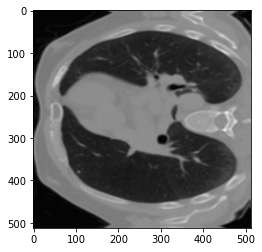

In [8]:
imshow(images[45], cmap= 'gray')

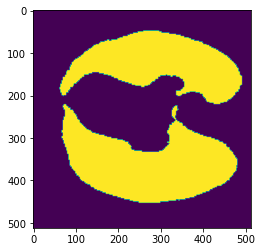

In [9]:
imshow(masks[45])

In [10]:
#
#
R.setup_data(images, masks, dataset_size=4800, weights=weights)
# R.setup_data(images, masks, dataset_size=4160)

Weights OK!


In [11]:
RUNS = 10

In [13]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier(patience_counter=3)
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0


InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [ ]:
R.classifier_scores

In [14]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [3.23820579239964e-08, 1.0],
 [3.5584860058612833e-10, 1.0],
 [0.41429007053375244, 0.937313437461853],
 [1.3098301887512207, 0.841791033744812],
 [1.1245535612106323, 0.8597015142440796],
 [1.713136911392212, 0.8119403123855591],
 [2.575618267059326, 0.7283582091331482],
 [3.7790305614471436, 0.6567164063453674]]

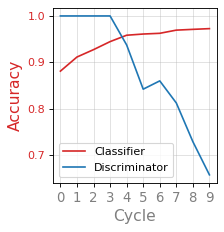

In [15]:
R.plot()

## Testing

In [16]:
A_test = R.M.get('A_test')
A_test_pred = R.M.get('A_test_pred')

In [17]:
A_train = R.M.get('A_train')
C_train = R.M.get('C_train')

In [18]:
A_train_, A_train_ids = A_train.to_array()
C_train_, C_train_ids = C_train.to_array()

In [19]:
A_train_.shape, C_train_.shape

((359, 512, 512, 2), (1175, 512, 512, 3))

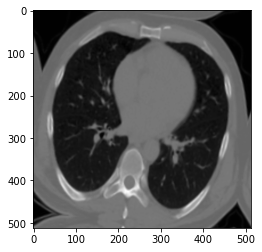

In [20]:
imshow(A_train_[4,:,:,0], cmap = 'gray')

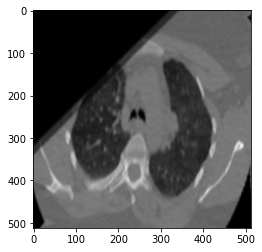

In [21]:
imshow(C_train_[14,:,:,0], cmap = 'gray')

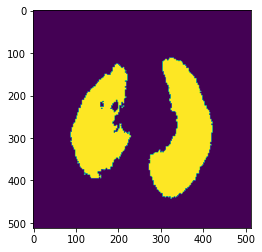

In [22]:
imshow(C_train_[14,:,:,1])

In [23]:
D = R.M.get('D')

D_, D_ids = D.to_array()
D_.shape
# D_images = D_[:,:,:,0]
# D_masks = D_[:,:,:,1]
# D_labels = D_[:,0,0,2]

(63, 512, 512, 3)

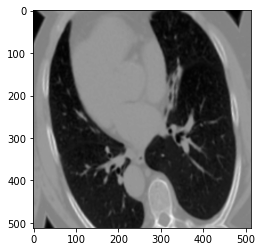

In [24]:
imshow(D_[14,:,:,0], cmap = 'gray')

In [25]:
A_test_images_only_, A_test_images_only_ids = A_test.to_array()
A_test_images_only_ = A_test_images_only_[:,:,:,0].astype(np.uint8)


A_test_pred_, A_test_pred_ids = A_test_pred.to_array()
A_test_pred_ = A_test_pred_.astype(np.uint8)

A_test_with_pred_ = np.stack((A_test_images_only_, A_test_pred_[:,:,:,0]), axis=-1)

In [26]:
A_test_with_pred_.shape

(1680, 512, 512, 2)

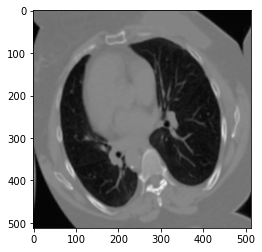

In [27]:
imshow(A_test_with_pred_[4,:,:,0], cmap='gray')

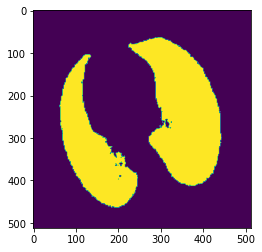

In [28]:
imshow(A_test_with_pred_[4,:,:,1])

In [ ]:
# for i in range(0, images.shape[0], 4):
#     # plot the slice [:, :, 50]
#     plt.figure("check", (12, 6))
#     plt.subplot(1, 4, 1) 
#     plt.title(i)
#     plt.imshow(images[i], cmap = 'gray')
#     plt.subplot(1, 4, 2)
#     plt.title(i+1)
#     plt.imshow(images[i+1], cmap = 'gray')
#     plt.subplot(1, 4, 3)    
#     plt.title(i+2)
#     plt.imshow(images[i+2], cmap = 'gray')
#     plt.subplot(1, 4, 4)    
#     plt.title(i+3)
#     plt.imshow(images[i+3], cmap = 'gray')

#     plt.show()
#     plt.show()